##About Dataset

A company has a fleet of devices transmitting daily sensor readings. They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, be sure to minimize false positives and false negatives. The column you are trying to Predict is called failure with binary value 0 for non-failure and 1 for failure

##Loading The Data

In [1]:
import pandas as pd
# Load the dataset
data = pd.read_csv(r"https://raw.githubusercontent.com/Virendra2499/MISC/main/predictive_maintenance_dataset.csv")
# Replace with your actual column names


# Display the first few rows of the dataset
data.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [2]:
data['date'].value_counts()

,count
date,
1/1/2015,1163
1/2/2015,1163
1/3/2015,1163
1/4/2015,1162
1/5/2015,1161
...,...
10/27/2015,31
10/29/2015,31
10/30/2015,31


##Preprocessing and splitting the Dataset in testing and training sets

In [3]:
# Drop the columns from the DataFrame
data = data.drop(columns=['date','device'])

In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is the DataFrame
# Shuffle the DataFrame
df_shuffled = data.sample(frac=1, random_state=42)  # Shuffle the data

# Step 1: Perform the initial split (80% train, 20% test)
split_index = int(0.8 * len(df_shuffled))
train_df = df_shuffled[:split_index]
test_df = df_shuffled[split_index:]

# Step 2: Use train_test_split on the 80% train data to create train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

# Display the shapes to confirm
train_df.shape, val_df.shape, test_df.shape

((74696, 10), (24899, 10), (24899, 10))

In [5]:
from sklearn.model_selection import train_test_split

# df_shuffled is the shuffled DataFrame from the previous step
# Step 1: Perform the initial split (80% train, 20% test)
split_index = int(0.8 * len(df_shuffled))
train_df = df_shuffled[:split_index]
test_df = df_shuffled[split_index:]

# Step 2: Use train_test_split on the 80% train data to create train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

# Display the shapes to confirm
train_df.shape, val_df.shape, test_df.shape


((74696, 10), (24899, 10), (24899, 10))

In [6]:
# 'train_df', 'val_df', 'test_df' have the last column as the target variable
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import numpy as np

# Splitting the features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_val = val_df.iloc[:, :-1].values
y_val = val_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [7]:
from sklearn.preprocessing import StandardScaler

# Import the StandardScaler class
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

##Building the Neural Network

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Step 3: Define the model architecture
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer + Hidden layer 1
    Dense(32, activation='relu'),                              # Hidden layer 2
    Dense(y_train.shape[1], activation='softmax')              # Output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##Training the Model

In [9]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7496 - loss: 1.4393 - val_accuracy: 0.7939 - val_loss: 0.9379
Epoch 2/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7933 - loss: 0.9141 - val_accuracy: 0.7957 - val_loss: 0.8889
Epoch 3/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7969 - loss: 0.8671 - val_accuracy: 0.7991 - val_loss: 0.8513
Epoch 4/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8062 - loss: 0.8206 - val_accuracy: 0.8036 - val_loss: 0.8172
Epoch 5/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8061 - loss: 0.8026 - val_accuracy: 0.8072 - val_loss: 0.7963
Epoch 6/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8097 - loss: 0.7738 - val_accuracy: 0.8089 - val_loss: 0.7686
Epoch 7/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8108 - loss: 0.7513 - val_accuracy: 0.8077 - val_loss: 0.7578
Epoch 8/50
2335/2335 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8133 - loss: 0.7330 -

##Evaluating The Model

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8309 - loss: 0.6267
Test Accuracy: 0.8331


##Making Predictions

In [11]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=-1)

# Example: Print the first 10 predictions
print(predicted_classes[:10])

779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[0 0 0 0 0 0 0 0 0 0]


In [12]:
y_prob = model.predict(X_test)

779/779 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
# Import the necessary function
from sklearn.metrics import accuracy_score

# Convert y_test to multiclass
y_test_multiclass = y_test.argmax(axis=1)  # Assuming y_test is one-hot encoded
accuracy_score(y_test_multiclass, y_pred) # Now this line should work as well

0.8331258283465199

##Plotting Some graphs for analysis

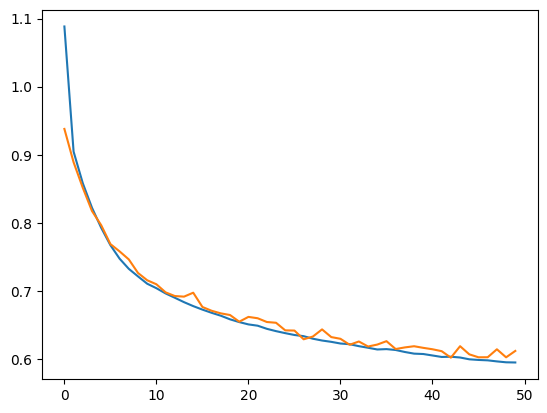

In [15]:
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

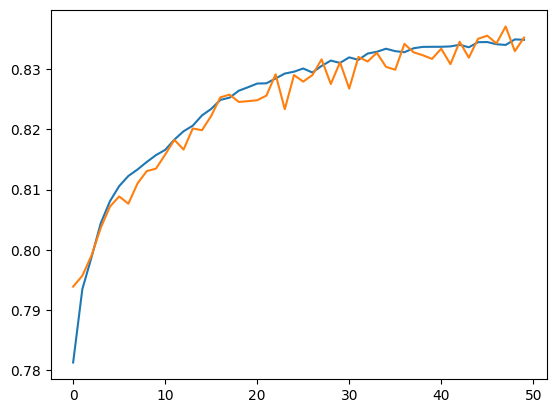

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])